In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [3]:
theta = 3
alpha = 0.1
dat = []
for oo in range(0, 10):
    res = alpha * 2 * theta
    print("{0:.4f} {1:.4f}".format(theta, res))
    dat.append([theta, theta**2])
    theta = theta = res

3.0000 0.6000
0.6000 0.1200
0.1200 0.0240
0.0240 0.0048
0.0048 0.0010
0.0010 0.0002
0.0002 0.0000
0.0000 0.0000
0.0000 0.0000
0.0000 0.0000


In [4]:
tmp = pd.DataFrame(dat)
tmp

,0,1
0,3.000000,9.000000e+00
1,0.600000,3.600000e-01
2,0.120000,1.440000e-02
3,0.024000,5.760000e-04
4,0.004800,2.304000e-05
5,0.000960,9.216000e-07
6,0.000192,3.686400e-08
7,0.000038,1.474560e-09
8,0.000008,5.898240e-11
9,0.000002,2.359296e-12


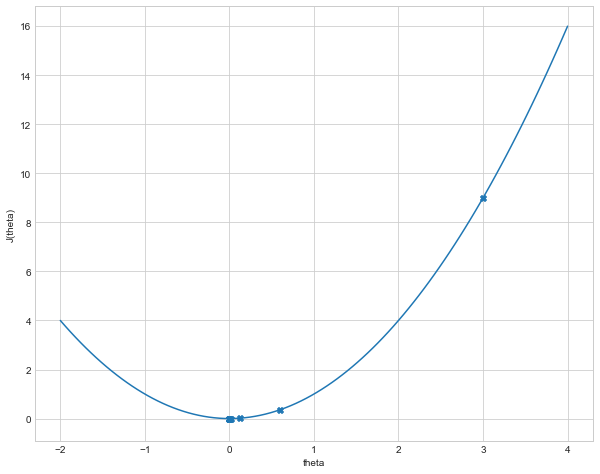

In [5]:
plt.figure(figsize = (10, 8))
plt.plot(np.linspace(-2, 4, 100), np.linspace(-2, 4, 100)**2);
plt.scatter(tmp.iloc[:, 0], tmp.iloc[:, 1], marker="X");
plt.xlabel("theta");
plt.ylabel("J(theta)");

# Second example

In [6]:
theta = 3
alpha = 0.01
dat = []
for oo in range(0, 10):
    res = alpha *( 4*theta**3+2*theta)
    print("{0:.4f} {1:.4f}".format(theta, res))
    dat.append([theta, theta ** 4 + theta **2])
    theta = theta - res

3.0000 1.1400
1.8600 0.2946
1.5654 0.1847
1.3807 0.1329
1.2478 0.1027
1.1451 0.0830
1.0621 0.0692
0.9930 0.0590
0.9339 0.0513
0.8827 0.0452


In [7]:
tmp  = pd.DataFrame(dat)
tmp

,0,1
0,3.000000,90.000000
1,1.860000,15.428432
2,1.565406,8.455422
3,1.380657,5.539863
4,1.247771,3.980968
5,1.145108,3.030703
6,1.062144,2.400869
7,0.992970,1.958167
8,0.933949,1.633098
9,0.882684,1.386175


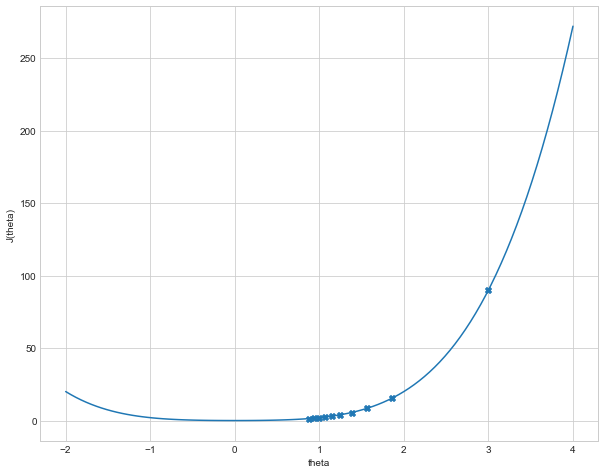

In [9]:
plt.figure(figsize=(10,8))
x_grid = np.linspace(-2, 4, 100)
plt.plot(x_grid, x_grid ** 4 + x_grid ** 2);
plt.scatter(tmp.iloc[:,0], tmp.iloc[:,1], marker='X');
plt.xlabel('theta');
plt.ylabel('J(theta)');

In [10]:
from sklearn.datasets import load_boston

In [11]:
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)

In [12]:
X = df[["LSTAT"]].values
y = boston_data.target

In [14]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.reshape(-1, 1)).flatten()

In [19]:
alpha = 0.0001
w_ = np.zeros(1 + X_std.shape[1])
cost_ = []
n_ = 100
for i in range(n_):
    y_pred = np.dot(X_std, w_[1:]) + w_[0]
    errors = (y_std - y_pred)
    
    w_[1:] += alpha * X_std.T.dot(errors)
    w_[0]  += alpha * errors.sum()

In [20]:
 np.dot(X_std, w_[1:])

array([  7.88992450e-01,   3.61235179e-01,   8.86677403e-01,
         9.98758034e-01,   7.53003256e-01,   7.65342408e-01,
         2.29367604e-02,  -6.68055754e-01,  -1.77652291e+00,
        -4.57261907e-01,  -8.01729901e-01,  -6.34373039e-02,
        -3.14333395e-01,   4.51722294e-01,   2.46069760e-01,
         4.30128778e-01,   6.24470422e-01,  -2.07394078e-01,
         9.90281980e-02,   1.41186967e-01,  -8.60340873e-01,
        -1.21020013e-01,  -6.23840459e-01,  -7.43118929e-01,
        -3.75000893e-01,  -3.96594409e-01,  -2.21789755e-01,
        -4.75770635e-01,  -1.51089584e-02,   6.92085805e-02,
        -1.02280638e+00,  -3.97872625e-02,  -1.54824860e+00,
        -5.85794740e-01,  -7.90419012e-01,   3.05708995e-01,
         1.27819553e-01,   3.99280898e-01,   2.59437175e-01,
         8.56857786e-01,   1.09747125e+00,   8.03388127e-01,
         7.03646648e-01,   5.36039833e-01,   3.19076409e-01,
         2.51211073e-01,  -1.53924419e-01,  -6.32066560e-01,
        -1.86701003e+00,